In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import torch
import os.path as osp
import glob

from os import listdir
from matplotlib import pyplot as plt
from PIL import Image

BASE_DIR = r"C:\Users\User\Desktop\work\datasets\blood-vessel-segmentation"


## UTILS

In [24]:
def show_kidney_dataset(images, masks, filenames, cmap="rainbow"):
    fig, ax = plt.subplots(len(images), 2 ,figsize=(15, 20))
    n_itr = max(len(images), len(masks))
    for n in range(len(images)):
        if len(images) == 1:
            if images[n] is not None:
                ax[0].imshow(images[n], cmap=cmap)
            ax[0].set_title(f"Image: {filenames[n]}")
            ax[1].imshow(masks[n])
            ax[1].set_title(f"Mask: {filenames[n]}")
        else:
            if images[n] is not None:
                ax[n, 0].imshow(images[n], cmap=cmap)
            ax[n, 0].set_title(f"Image: {filenames[n]}")
            ax[n, 1].imshow(masks[n])
            ax[n, 1].set_title(f"Mask: {filenames[n]}")
    plt.show()

class KidneyIterator:
    
    def __init__(self, basepath, batch_size=1):
        self.basepath = basepath
        self.batch_size = batch_size
        if osp.exists(osp.join(basepath, "images")):
            self.files = sorted(listdir(osp.join(basepath, "images")))
        else:
            self.files = sorted(listdir(osp.join(basepath, "labels")))
        self.length = len(self.files)
    
    def get_loader(self):
        filenames = []
        images = []
        masks = []
        idx = 0
        
        for path in self.files:
            if osp.exists(osp.join(self.basepath, "images", path)):
                img = Image.open(osp.join(self.basepath, "images", path))
            else:
                img = None
            mask = Image.open(osp.join(self.basepath, "labels", path))
            
            if img:
                img = np.array(img)
            mask = np.array(mask)
            
            images.append(img)
            masks.append(mask)
            filenames.append(f"{path}")
            
            idx += 1
            if idx == self.batch_size:
                yield images, masks, filenames
                filenames = []
                images = []
                masks = []
                idx = 0
        if idx > 0:
            yield images, masks, filenames

## DRAW IMAGES

2279


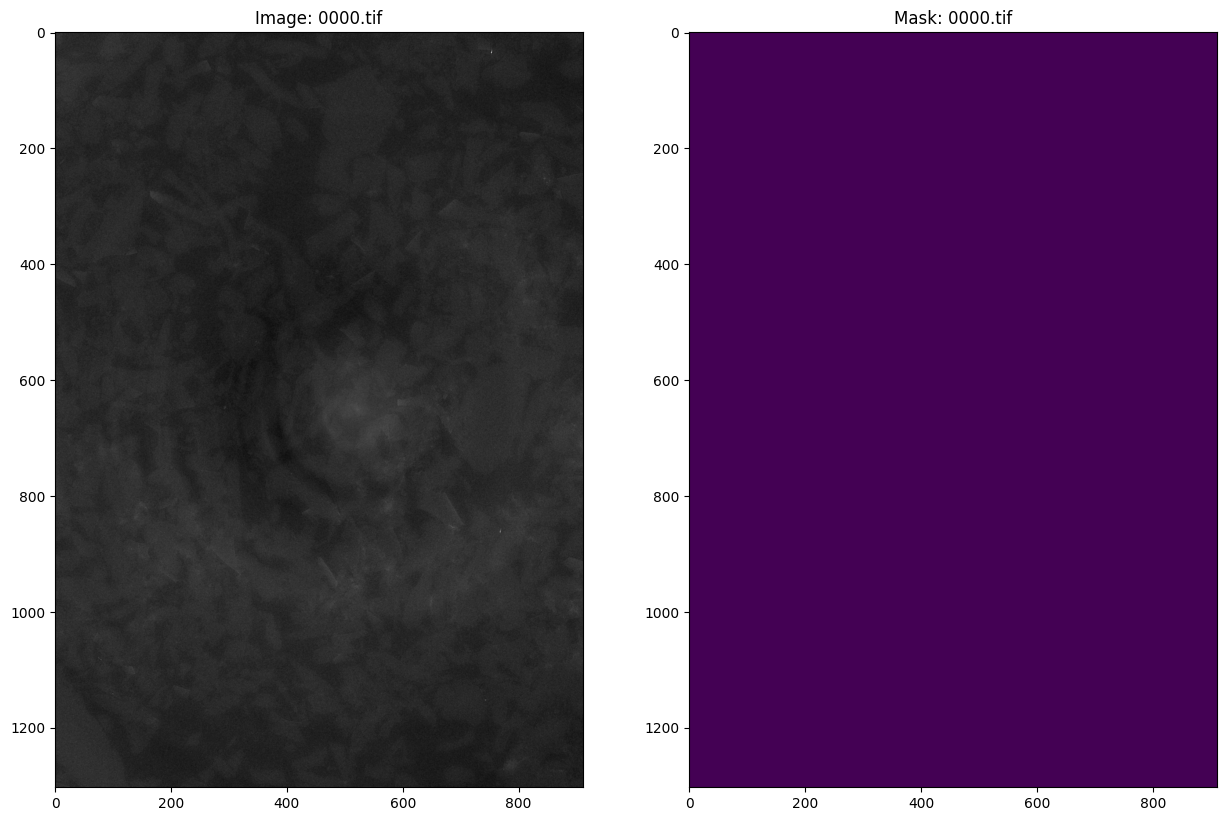

(1303, 912)
18515
36640


In [25]:
path = r"train\kidney_1_dense"
image_loader = KidneyIterator(osp.join(BASE_DIR, path))
iterator = image_loader.get_loader()
print(image_loader.length)

images, masks, filenames = next(iterator)
show_kidney_dataset(images, masks, filenames, cmap="gray")
print(images[0].shape)
print(images[0].min())
print(images[0].max())

1397


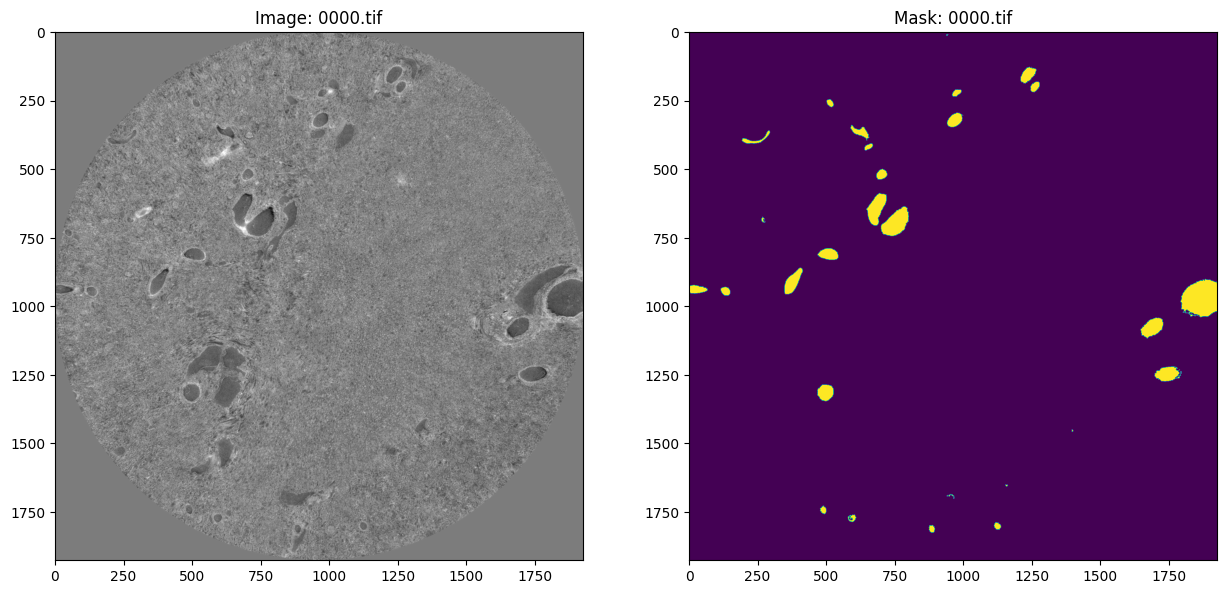

(1928, 1928)
1507
65535


In [26]:
path = r"train\kidney_1_voi"
image_loader = KidneyIterator(osp.join(BASE_DIR, path))
iterator = image_loader.get_loader()
print(image_loader.length)

images, masks, filenames = next(iterator)
show_kidney_dataset(images, masks, filenames, cmap="gray")
print(images[0].shape)
print(images[0].min())
print(images[0].max())

2217


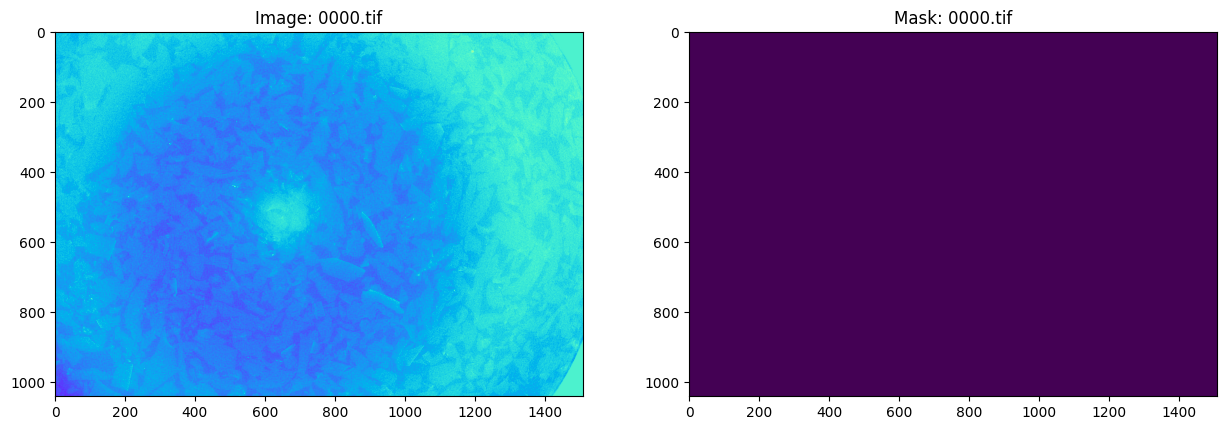

(1041, 1511)
25235
44088


In [21]:
path = "train/kidney_2/"
image_loader = KidneyIterator(osp.join(BASE_DIR, path), batch_size=1)
iterator = image_loader.get_loader()
print(image_loader.length)
images, masks, filenames = next(iterator)
show_kidney_dataset(images, masks, filenames)
print(images[0].shape)
print(images[0].min())
print(images[0].max())

501


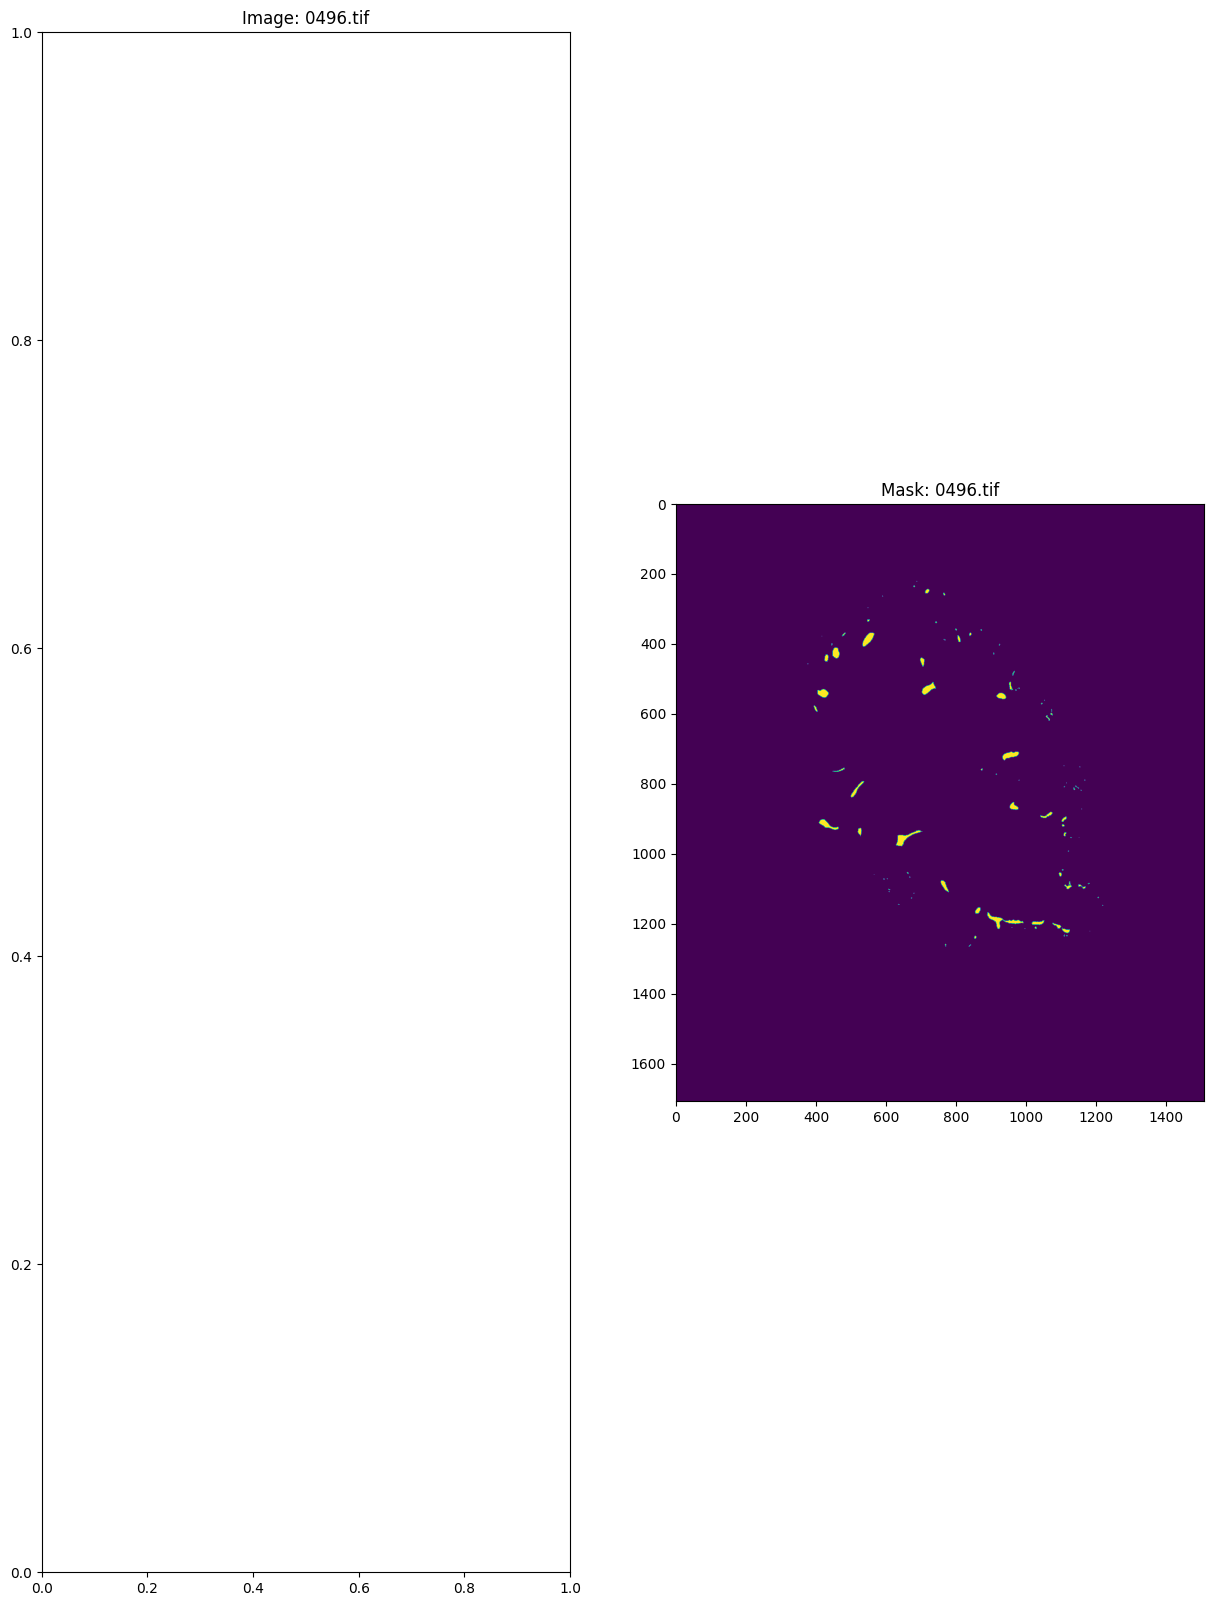

In [22]:
path = "train/kidney_3_dense/"
image_loader = KidneyIterator(osp.join(BASE_DIR, path), batch_size=1)
iterator = image_loader.get_loader()
print(image_loader.length)
images, masks, filenames = next(iterator)
show_kidney_dataset(images, masks, filenames)
if images[0]:
    print(images[0].shape)
    print(images[0].min())
    print(images[0].max())

1035


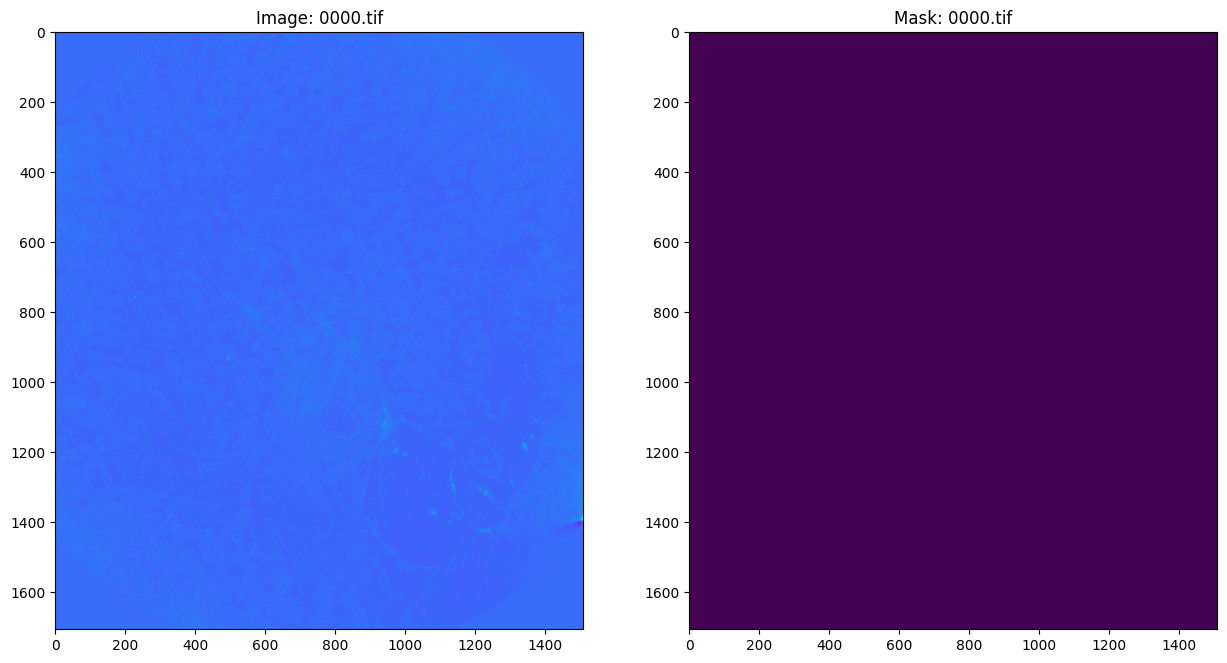

(1706, 1510)
17822
29160


In [23]:
path = "train/kidney_3_sparse/"
image_loader = KidneyIterator(osp.join(BASE_DIR, path), batch_size=1)
iterator = image_loader.get_loader()
print(image_loader.length)
images, masks, filenames = next(iterator)
show_kidney_dataset(images, masks, filenames)
print(images[0].shape)
print(images[0].min())
print(images[0].max())

## EDA

In [6]:
files = sorted(glob.glob(f"{BASE_DIR}/train/kidney_1_dense/images/*.tif"))
masks = sorted(glob.glob(f"{BASE_DIR}/train/kidney_1_dense/labels/*.tif"))
df = pd.DataFrame(files, columns=["img_path"])
df.loc[:, "mask_path"] = masks
df.loc[:, "dataset"] = "kidney1_dense"

train = df.copy(deep=True)

In [7]:
for dataset in ["kidney_2", "kidney_3_sparse"]:
    files = sorted(glob.glob(f"{BASE_DIR}/train/{dataset}/images/*.tif"))
    masks = sorted(glob.glob(f"{BASE_DIR}/train/{dataset}/labels/*.tif"))
    df = pd.DataFrame(files, columns=["img_path"])
    df.loc[:, "mask_path"] = masks
    df.loc[:, "dataset"] = dataset
    
    train = pd.concat([train, df], axis=0)

In [8]:
train.shape

(5531, 3)